# WeatherPy
----

### Analysis
##### 1. As expected, the plot of city latitude vesus temperature(F) shows that the weather becomes warmer as one approaches the equator at 0 Degrees Latitude. An interesting oberservation is the southern hemisphere seems to be hotter at this time of year than the notherern hemisphere. Since it's winter in the Northern Hemisphere, it's summer in the Southern Hemisphere and the data show that being the case since Cities at -40 degrees latitude are showing higher temperatures than cities at 40 degrees latitude. Personally, I would need to live in a city between -35 and 35 latitude because I don't like to be cold!

##### 2. There does not seem to be a strong relationship between latitude and cloudiness nor a correlation between latitude and humidity. It is important to note cities at all latitudes tended toward having a higher humidty at this time of year with a significant number of cities having humities above 80%. I would need to compare this to humidty readings in July to see if there is any relationship. City cloudiness showed a strong line of cities having 0% cloudiness, a strong line of cities at 75% cloudiness and another line of cities at 95% cloudiness.

##### 3. When plotting latitude against wind speeds, there was little relationship that could be found. Most the the cities show beign wind speeds of under 15 mph at this time of year. There were however, cities towards the north and south poles showing higher wind speeds than at the equator. At this time there are not enough data points at the two extreme pole to see if this is indeed a significant obersavation or an outlier.  
---

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from datetime import datetime
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities_df = pd.DataFrame({"City":cities}).reset_index()
cities_df.count()

index    615
City     615
dtype: int64

In [6]:
#set up additional columns to hold weather information
cities_df['Country'] = ''
cities_df['Date'] = ''
cities_df['Latitude'] = ''
cities_df['Longitude'] = ''
cities_df['Temperature(F)'] = ''
cities_df['Humidity(%)'] = ''
cities_df['Cloudiness(%)'] = ''
cities_df['WindSpeed(mph)'] = ''
cities_df.head()

,index,City,Country,Date,Latitude,Longitude,Temperature(F),Humidity(%),Cloudiness(%),WindSpeed(mph)
0,0,dali,,,,,,,,
1,1,carnarvon,,,,,,,,
2,2,bengkulu,,,,,,,,
3,3,bluff,,,,,,,,
4,4,fort nelson,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


print(query_url)
print(query_url + city)

http://api.openweathermap.org/data/2.5/weather?appid=71435179e8b51b15e0a016f1ab88894e&units=imperial&q=
http://api.openweathermap.org/data/2.5/weather?appid=71435179e8b51b15e0a016f1ab88894e&units=imperial&q=panacan


In [8]:
#Add a two second interval between queries to stay within API query limits
time.sleep(3)
response_json = []
print("Begin Retrieving Weather Data")

print("-------------------------------")
for index, row in cities_df.iterrows():
    
    #get city name form df
    city_name = row['City']
    
    city_url = query_url + city_name.replace(" ","+")
    #assemble url and make API request
    print(f"Retrieving Weather Data Results for City {index}: {city_name}.")
    response = requests.get(city_url).json()
    if response['cod'] == "404":
        print("No City Info found, skipping...")
    else:
        print(f"Weather Data for {city_name} added to results")
        
        cities_df.loc[index, 'Country'] = response['sys']['country']
        cities_df.loc[index, 'Date'] = response['dt']
        cities_df.loc[index, 'Latitude'] = response['coord']['lat']
        cities_df.loc[index, 'Longitude'] = response['coord']['lon']
        cities_df.loc[index, 'Temperature(F)'] = response['main']['temp']
        cities_df.loc[index, 'Humidity(%)'] = response['main']['humidity']
        cities_df.loc[index, 'Cloudiness(%)'] = response['clouds']['all']
        cities_df.loc[index, 'WindSpeed(mph)'] = response['wind']['speed']
        
    print("---------------------------------")
    

Begin Retrieving Weather Data
-------------------------------
Retrieving Weather Data Results for City 0: dali.
Weather Data for dali added to results
---------------------------------
Retrieving Weather Data Results for City 1: carnarvon.
Weather Data for carnarvon added to results
---------------------------------
Retrieving Weather Data Results for City 2: bengkulu.
No City Info found, skipping...
---------------------------------
Retrieving Weather Data Results for City 3: bluff.
Weather Data for bluff added to results
---------------------------------
Retrieving Weather Data Results for City 4: fort nelson.
Weather Data for fort nelson added to results
---------------------------------
Retrieving Weather Data Results for City 5: ushuaia.
Weather Data for ushuaia added to results
---------------------------------
Retrieving Weather Data Results for City 6: albany.
Weather Data for albany added to results
---------------------------------
Retrieving Weather Data Results for City 7: 

Weather Data for tautira added to results
---------------------------------
Retrieving Weather Data Results for City 64: richards bay.
Weather Data for richards bay added to results
---------------------------------
Retrieving Weather Data Results for City 65: berea.
Weather Data for berea added to results
---------------------------------
Retrieving Weather Data Results for City 66: qaanaaq.
Weather Data for qaanaaq added to results
---------------------------------
Retrieving Weather Data Results for City 67: naryan-mar.
Weather Data for naryan-mar added to results
---------------------------------
Retrieving Weather Data Results for City 68: hami.
Weather Data for hami added to results
---------------------------------
Retrieving Weather Data Results for City 69: meadow lake.
Weather Data for meadow lake added to results
---------------------------------
Retrieving Weather Data Results for City 70: mataura.
Weather Data for mataura added to results
---------------------------------


Weather Data for cidreira added to results
---------------------------------
Retrieving Weather Data Results for City 127: ixtapa.
Weather Data for ixtapa added to results
---------------------------------
Retrieving Weather Data Results for City 128: hilo.
Weather Data for hilo added to results
---------------------------------
Retrieving Weather Data Results for City 129: agadez.
Weather Data for agadez added to results
---------------------------------
Retrieving Weather Data Results for City 130: romitan.
Weather Data for romitan added to results
---------------------------------
Retrieving Weather Data Results for City 131: venado tuerto.
Weather Data for venado tuerto added to results
---------------------------------
Retrieving Weather Data Results for City 132: cubuk.
Weather Data for cubuk added to results
---------------------------------
Retrieving Weather Data Results for City 133: lodwar.
Weather Data for lodwar added to results
---------------------------------
Retrieving

Weather Data for warwick added to results
---------------------------------
Retrieving Weather Data Results for City 189: inderborskiy.
No City Info found, skipping...
---------------------------------
Retrieving Weather Data Results for City 190: lata.
Weather Data for lata added to results
---------------------------------
Retrieving Weather Data Results for City 191: garissa.
Weather Data for garissa added to results
---------------------------------
Retrieving Weather Data Results for City 192: meiningen.
Weather Data for meiningen added to results
---------------------------------
Retrieving Weather Data Results for City 193: inuvik.
Weather Data for inuvik added to results
---------------------------------
Retrieving Weather Data Results for City 194: kirs.
Weather Data for kirs added to results
---------------------------------
Retrieving Weather Data Results for City 195: buchanan.
Weather Data for buchanan added to results
---------------------------------
Retrieving Weather D

Weather Data for noumea added to results
---------------------------------
Retrieving Weather Data Results for City 252: kirkkonummi.
Weather Data for kirkkonummi added to results
---------------------------------
Retrieving Weather Data Results for City 253: palmer.
Weather Data for palmer added to results
---------------------------------
Retrieving Weather Data Results for City 254: hermiston.
Weather Data for hermiston added to results
---------------------------------
Retrieving Weather Data Results for City 255: cam pha.
No City Info found, skipping...
---------------------------------
Retrieving Weather Data Results for City 256: clarence town.
Weather Data for clarence town added to results
---------------------------------
Retrieving Weather Data Results for City 257: santiago de compostela.
Weather Data for santiago de compostela added to results
---------------------------------
Retrieving Weather Data Results for City 258: awjilah.
Weather Data for awjilah added to results


Weather Data for preobrazheniye added to results
---------------------------------
Retrieving Weather Data Results for City 314: belushya guba.
No City Info found, skipping...
---------------------------------
Retrieving Weather Data Results for City 315: hovd.
Weather Data for hovd added to results
---------------------------------
Retrieving Weather Data Results for City 316: illoqqortoormiut.
No City Info found, skipping...
---------------------------------
Retrieving Weather Data Results for City 317: tres arroyos.
Weather Data for tres arroyos added to results
---------------------------------
Retrieving Weather Data Results for City 318: barrow.
Weather Data for barrow added to results
---------------------------------
Retrieving Weather Data Results for City 319: tupik.
Weather Data for tupik added to results
---------------------------------
Retrieving Weather Data Results for City 320: hirara.
Weather Data for hirara added to results
---------------------------------
Retrievin

Weather Data for tiarei added to results
---------------------------------
Retrieving Weather Data Results for City 376: yuli.
Weather Data for yuli added to results
---------------------------------
Retrieving Weather Data Results for City 377: te anau.
Weather Data for te anau added to results
---------------------------------
Retrieving Weather Data Results for City 378: broome.
Weather Data for broome added to results
---------------------------------
Retrieving Weather Data Results for City 379: novovoronezh.
Weather Data for novovoronezh added to results
---------------------------------
Retrieving Weather Data Results for City 380: kotido.
Weather Data for kotido added to results
---------------------------------
Retrieving Weather Data Results for City 381: mount isa.
Weather Data for mount isa added to results
---------------------------------
Retrieving Weather Data Results for City 382: mariveles.
Weather Data for mariveles added to results
---------------------------------


Weather Data for emba added to results
---------------------------------
Retrieving Weather Data Results for City 439: belyy yar.
Weather Data for belyy yar added to results
---------------------------------
Retrieving Weather Data Results for City 440: kaitangata.
Weather Data for kaitangata added to results
---------------------------------
Retrieving Weather Data Results for City 441: mahajanga.
Weather Data for mahajanga added to results
---------------------------------
Retrieving Weather Data Results for City 442: veraval.
Weather Data for veraval added to results
---------------------------------
Retrieving Weather Data Results for City 443: champerico.
Weather Data for champerico added to results
---------------------------------
Retrieving Weather Data Results for City 444: christchurch.
Weather Data for christchurch added to results
---------------------------------
Retrieving Weather Data Results for City 445: pisco.
Weather Data for pisco added to results
------------------

Weather Data for petropavlovsk-kamchatskiy added to results
---------------------------------
Retrieving Weather Data Results for City 502: katsiveli.
No City Info found, skipping...
---------------------------------
Retrieving Weather Data Results for City 503: karkaralinsk.
No City Info found, skipping...
---------------------------------
Retrieving Weather Data Results for City 504: kotka.
Weather Data for kotka added to results
---------------------------------
Retrieving Weather Data Results for City 505: trairi.
Weather Data for trairi added to results
---------------------------------
Retrieving Weather Data Results for City 506: tamandare.
Weather Data for tamandare added to results
---------------------------------
Retrieving Weather Data Results for City 507: sorkjosen.
No City Info found, skipping...
---------------------------------
Retrieving Weather Data Results for City 508: tartagal.
Weather Data for tartagal added to results
---------------------------------
Retrieving

Weather Data for kaeo added to results
---------------------------------
Retrieving Weather Data Results for City 565: finschhafen.
Weather Data for finschhafen added to results
---------------------------------
Retrieving Weather Data Results for City 566: moura.
Weather Data for moura added to results
---------------------------------
Retrieving Weather Data Results for City 567: tulun.
Weather Data for tulun added to results
---------------------------------
Retrieving Weather Data Results for City 568: vrede.
Weather Data for vrede added to results
---------------------------------
Retrieving Weather Data Results for City 569: pajapan.
Weather Data for pajapan added to results
---------------------------------
Retrieving Weather Data Results for City 570: bilibino.
Weather Data for bilibino added to results
---------------------------------
Retrieving Weather Data Results for City 571: bandar-e torkaman.
No City Info found, skipping...
---------------------------------
Retrieving W

In [9]:
cities_df.head()

,index,City,Country,Date,Latitude,Longitude,Temperature(F),Humidity(%),Cloudiness(%),WindSpeed(mph)
0,0,dali,CN,1547400090,25.6,100.24,36.55,100,0,2.15
1,1,carnarvon,ZA,1547400090,-30.97,22.13,75.74,26,0,9.42
2,2,bengkulu,,,,,,,,
3,3,bluff,AU,1547400091,-23.58,149.07,70.75,71,0,10.65
4,4,fort nelson,CA,1547395920,58.81,-122.69,-9.41,83,90,4.7


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# Output File (CSV)
cities_df.to_csv("output_data/cities.csv")

In [11]:
cities_df[["Latitude", "Longitude", "Temperature(F)", "Humidity(%)",
          "Cloudiness(%)", "WindSpeed(mph)"]] = cities_df[["Latitude", "Longitude", "Temperature(F)", "Humidity(%)",
          "Cloudiness(%)", "WindSpeed(mph)"]].apply(pd.to_numeric)

cities_df.dtypes


index               int64
City               object
Country            object
Date               object
Latitude          float64
Longitude         float64
Temperature(F)    float64
Humidity(%)       float64
Cloudiness(%)     float64
WindSpeed(mph)    float64
dtype: object

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

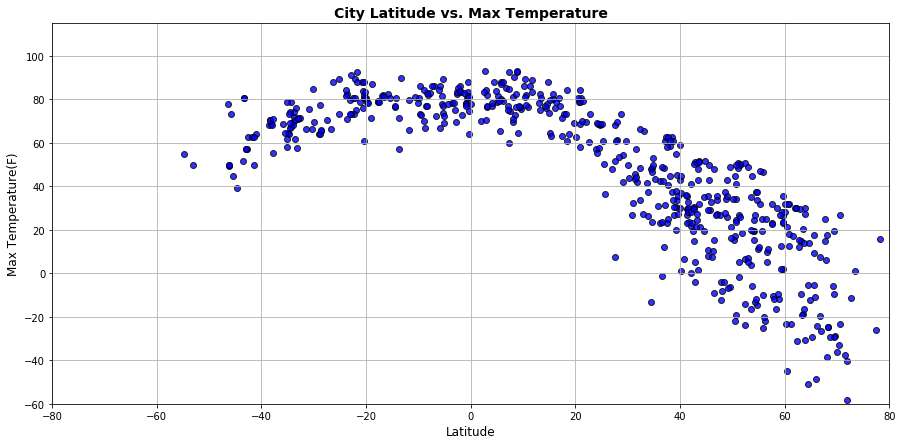

In [13]:
#Build a scatter plot for Latitude vs. Temperature
plt.figure(figsize = (15,7))
plt.scatter(cities_df["Latitude"], cities_df["Temperature(F)"], marker="o",
            facecolors="blue", edgecolor="black", linewidths=1, alpha=0.8, label="City")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature", fontsize=14, fontweight="bold")
plt.ylabel("Max Temperature(F)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid(True)
plt.xlim([-80, 80])
plt.ylim([-60, 115])

# Save the figure
plt.savefig("output_data/LatvTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

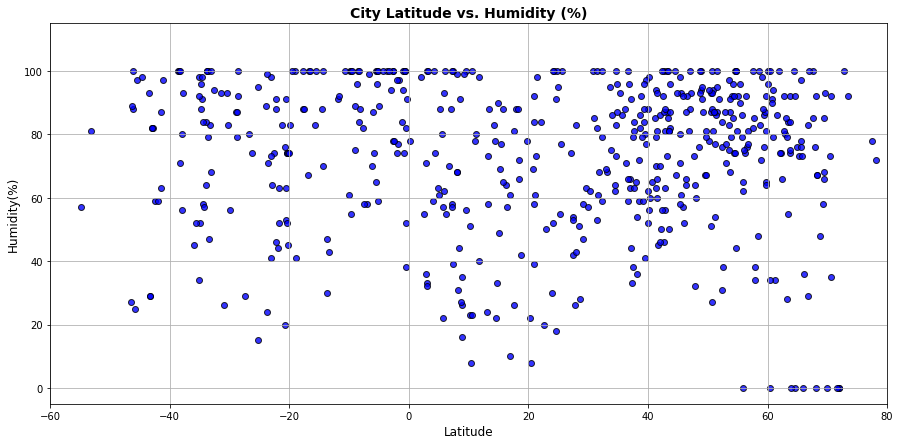

In [14]:
#Build a scatter plot for Latitude vs. Humidity (%)

plt.figure(figsize = (15,7))
plt.scatter(cities_df["Latitude"], cities_df["Humidity(%)"], marker="o",
            facecolors="blue", edgecolor="black", linewidths=1, alpha=0.8, label="City")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity (%)", fontsize=14, fontweight="bold")
plt.ylabel("Humidity(%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid(True)
plt.xlim([-60, 80])
plt.ylim([-5, 115])

# Save the figure
plt.savefig("output_data/LatvHumid.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

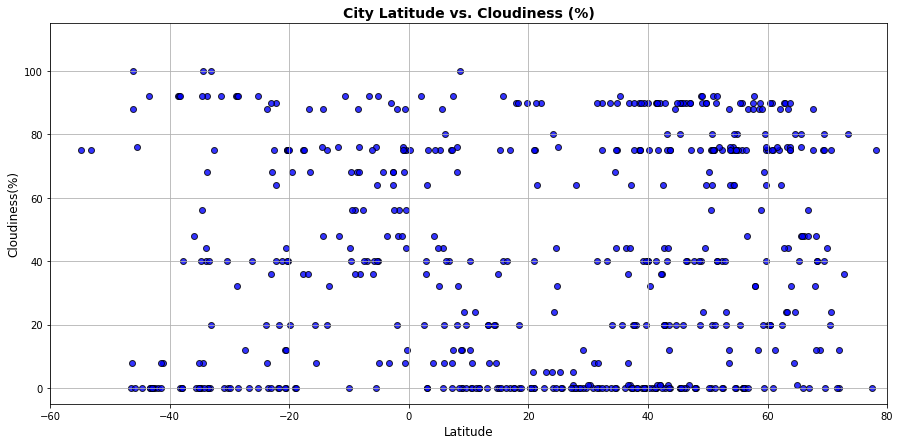

In [15]:
#Build a scatter plot for Latitude vs. Cloudiness (%)
plt.figure(figsize = (15,7))
plt.scatter(cities_df["Latitude"], cities_df["Cloudiness(%)"], marker="o",
            facecolors="blue", edgecolor="black", linewidths=1, alpha=0.8, label="City")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%)", fontsize=14, fontweight="bold")
plt.ylabel("Cloudiness(%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid(True)
plt.xlim([-60, 80])
plt.ylim([-5, 115])

# Save the figure
plt.savefig("output_data/LatvCloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

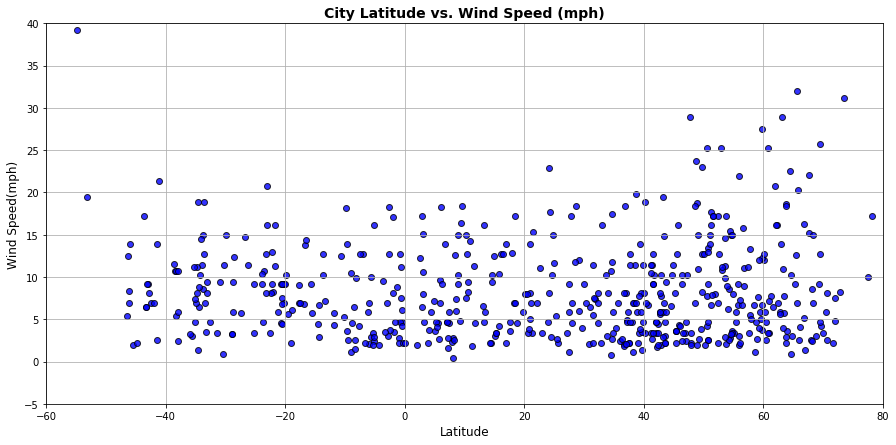

In [16]:
#Build a scatter plot for Latitude vs. Wind Speed (mph)
fig = plt.figure(figsize = (15,7)).set_facecolor('w')

plt.scatter(cities_df["Latitude"], cities_df["WindSpeed(mph)"], marker="o", 
            facecolors="blue", edgecolor="black", linewidths=1, alpha=0.8, label="City")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (mph)", fontsize=14, fontweight="bold")
plt.ylabel("Wind Speed(mph)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid(True)
plt.xlim([-60, 80])
plt.ylim([-5, 40])

# Save the figure
plt.savefig("output_data/LatvWind.png")

# Show plot
plt.show()